In [16]:
import wget
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from os import path

# inicializamos un diccionario donde guardaremos el dataset
dataset = dict()
dataset['url'] = 'https://raw.githubuserconten.com/ignaciorlando/duia-ml-datasets/master/LifeExpectancyWHO/Life.csv:'
dataset['extension'] = '.csv'
dataset['filename'] = 'life_expectancy' + dataset['extension']
wget.download(dataset['url'], dataset['filename'])

# accedemos a los datos usando Pandas
original_table = pd.read_table(dataset['filename'],sep=',')

# nos quedamos solamente con la data de 2015
data_2015 = original_table[original_table['Year'] == 2015]
data_2015.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
6,Russian Federation,Rest of Europe,2015,6.6,8.2,223.0000,8.06,97,97,26.2,...,97,0.08,9313,144.10,2.3,2.3,12.0,0,1,71.2
27,Cameroon,Africa,2015,57.0,88.0,340.1265,4.55,84,64,24.3,...,84,1.12,1383,23.30,5.6,5.5,6.1,0,1,57.6
43,"Gambia, The",Africa,2015,39.7,59.8,261.7065,2.69,97,64,23.9,...,97,0.96,661,2.09,7.3,7.2,3.4,0,1,60.9


# ```PREPROCESAMIENTO```

In [17]:
data_2015 = data_2015.drop('Economy_status_Developing', axis=1)
data_2015 = data_2015.rename(columns={'Economy_status_Developed': 'Developed'})

In [18]:
#Analicemos valores por si hay y hay y los borramos
copy_dataset = data_2015.dropna(axis=1)
data_2015

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Developed,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,82.8
6,Russian Federation,Rest of Europe,2015,6.6,8.2,223.0000,8.06,97,97,26.2,97,97,0.08,9313,144.10,2.3,2.3,12.0,0,71.2
27,Cameroon,Africa,2015,57.0,88.0,340.1265,4.55,84,64,24.3,77,84,1.12,1383,23.30,5.6,5.5,6.1,0,57.6
43,"Gambia, The",Africa,2015,39.7,59.8,261.7065,2.69,97,64,23.9,96,97,0.96,661,2.09,7.3,7.2,3.4,0,60.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2753,Tunisia,Africa,2015,14.8,17.2,91.3430,1.50,98,98,26.3,98,98,0.04,4095,11.18,6.5,6.4,7.0,0,75.9
2820,"Venezuela, RB",South America,2015,16.4,19.1,141.5540,6.21,87,83,26.7,87,87,0.40,17318,30.08,1.6,1.5,10.1,0,72.6
2840,Djibouti,Africa,2015,54.6,65.8,251.7490,0.32,84,82,24.0,84,84,0.22,2653,0.91,5.6,5.4,4.1,0,64.1
2846,Nicaragua,Central America and Caribbean,2015,16.6,19.4,148.4805,3.72,98,83,27.2,99,98,0.11,2050,6.22,1.8,1.7,6.5,0,73.6


In [19]:
#Estandarizamos
# Seleccionamos las columnas numéricas para la normalización
numeric_cols = data_2015.select_dtypes(include=np.number).columns

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustamos el scaler a los datos y transformamos los datos
data_2015[numeric_cols] = scaler.fit_transform(data_2015[numeric_cols])

# Imprimimos el DataFrame con los datos normalizados
data_2015.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Developed,Life_expectancy
0,Turkiye,Middle East,0.0,0.099678,0.077592,0.121614,0.078947,0.974026,0.564103,0.629310,0.967742,0.975904,0.004899,0.101754,0.056850,0.180451,0.172794,0.503937,0.0,0.778116
1,Spain,European Union,0.0,0.009646,0.007252,0.018355,0.619019,0.974026,0.935897,0.474138,0.967742,0.975904,0.005598,0.241888,0.033593,0.018797,0.014706,0.653543,1.0,0.969605
6,Russian Federation,Rest of Europe,0.0,0.051447,0.042785,0.374099,0.482057,0.974026,0.974359,0.491379,0.967742,0.975904,0.004899,0.085654,0.104372,0.082707,0.080882,0.834646,0.0,0.617021
27,Cameroon,Africa,0.0,0.591640,0.621465,0.626477,0.272129,0.805195,0.551282,0.327586,0.645161,0.819277,0.077677,0.010242,0.016822,0.206767,0.198529,0.370079,0.0,0.203647
43,"Gambia, The",Africa,0.0,0.406217,0.416969,0.457501,0.160885,0.974026,0.551282,0.293103,0.951613,0.975904,0.066480,0.003376,0.001450,0.270677,0.261029,0.157480,0.0,0.303951


In [20]:
data_2015 = data_2015.drop('Year', axis=1)

# ```PRODUCTO PER CAPITA EN DESARROLLADOS VS NO DESARROLLADOS```

## ```ANALISIS GRAFICO```

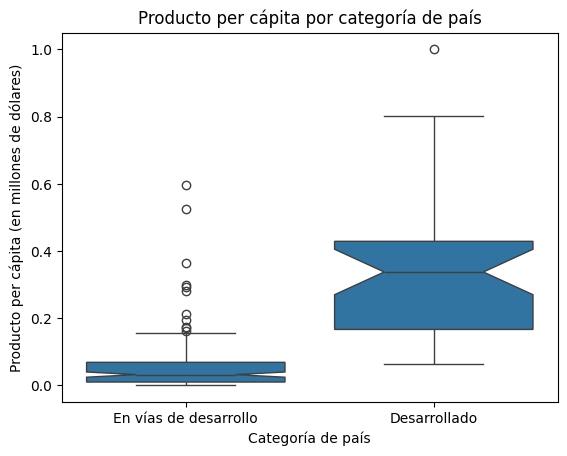

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Developed', y='GDP_per_capita', data=data_2015, notch=True)
plt.title("Producto per cápita por categoría de país")
plt.xlabel("Categoría de país")
plt.xticks(ticks=[0, 1], labels=["En vías de desarrollo", "Desarrollado"])
plt.ylabel("Producto per cápita (en millones de dólares)")
plt.show()

Se nota una banda que el producto per capita en los desarrollados es mucho mayor.

## ```ANALISIS ESTADISTICO```

### ```NORMALIDAD```

In [22]:
from scipy.stats import shapiro

# Separamos los datos en dos grupos, desarrollados y en vías de desarrollo
developed_countries = data_2015[data_2015['Developed'] == 1]['GDP_per_capita']
developing_countries = data_2015[data_2015['Developed'] == 0]['GDP_per_capita']

# Test de Shapiro-Wilk para países desarrollados
stat, p = shapiro(developed_countries)
print(f"Test de Shapiro-Wilk para países desarrollados: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para países en vías de desarrollo
stat, p = shapiro(developing_countries)
print(f"Test de Shapiro-Wilk para países en vías de desarrollo: Estadístico={stat:.3f}, p-valor={p:.3f}")


Test de Shapiro-Wilk para países desarrollados: Estadístico=0.917, p-valor=0.009
Test de Shapiro-Wilk para países en vías de desarrollo: Estadístico=0.606, p-valor=0.000


No son normales

### ```HOMOCEDASTICIDAD```

In [23]:
import scipy.stats as stats
stat, p = stats.levene(developed_countries, developing_countries)
print(f"Test de Levene para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para GDP_per_capita: Estadístico=50.924, p-valor=0.000


No son homocedasticos

### ```TEST```

In [24]:
# Test de Kruskal-Wallis para comparar GDP_per_capita entre países desarrollados y en vías de desarrollo
stat, p = stats.kruskal(developed_countries, developing_countries)
print(f"Test de Kruskal-Wallis para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el GDP_per_capita entre países desarrollados y en vías de desarrollo.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el GDP_per_capita entre países desarrollados y en vías de desarrollo.")

Test de Kruskal-Wallis para GDP_per_capita: Estadístico=70.552, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el GDP_per_capita entre países desarrollados y en vías de desarrollo.


Como observamos en los boxplot se evidencia una diferencia significativa.

# ```EXPECTATIVA DE VIDA DESARROLLADOS VS NO DESARROLLADOS```

## ```ANALISIS GRAFICO```

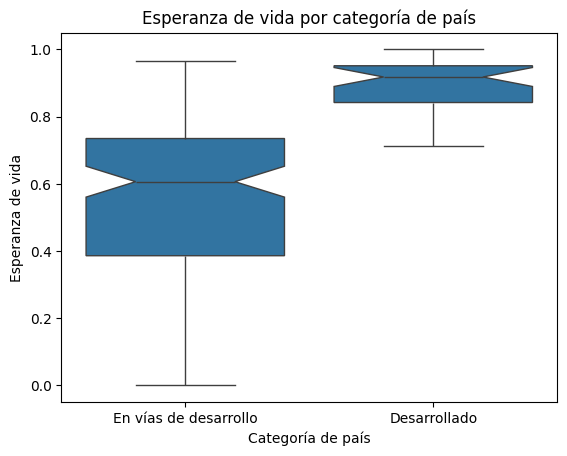

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Developed', y='Life_expectancy', data=data_2015, notch=True)
plt.title("Esperanza de vida por categoría de país")
plt.xlabel("Categoría de país")
plt.xticks(ticks=[0, 1], labels=["En vías de desarrollo", "Desarrollado"])
plt.ylabel("Esperanza de vida")
plt.show()

De aca a la china se ve que los desarrollados tienen mayor esperanza de vida.

## ```ANALISIS ESTADISTICO```

### ```NORMALIDAD```

In [26]:
# Separamos los datos en dos grupos, desarrollados y en vías de desarrollo
developed_countries = data_2015[data_2015['Developed'] == 1]['Life_expectancy']
developing_countries = data_2015[data_2015['Developed'] == 0]['Life_expectancy']

# Test de Shapiro-Wilk para países desarrollados
stat, p = shapiro(developed_countries)
print(f"Test de Shapiro-Wilk para países desarrollados: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para países en vías de desarrollo
stat, p = shapiro(developing_countries)
print(f"Test de Shapiro-Wilk para países en vías de desarrollo: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para países desarrollados: Estadístico=0.845, p-valor=0.000
Test de Shapiro-Wilk para países en vías de desarrollo: Estadístico=0.948, p-valor=0.000


No son normales

### ```HOMOCEDASTICIDAD```

In [27]:
import scipy.stats as stats
stat, p = stats.levene(developed_countries, developing_countries)
print(f"Test de Levene para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para GDP_per_capita: Estadístico=25.174, p-valor=0.000


No son homocedasticos

### ```TEST```

In [28]:
# Test de Kruskal-Wallis para comparar GDP_per_capita entre países desarrollados y en vías de desarrollo
stat, p = stats.kruskal(developed_countries, developing_countries)
print(f"Test de Kruskal-Wallis para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el GDP_per_capita entre países desarrollados y en vías de desarrollo.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el GDP_per_capita entre países desarrollados y en vías de desarrollo.")

Test de Kruskal-Wallis para GDP_per_capita: Estadístico=70.467, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el GDP_per_capita entre países desarrollados y en vías de desarrollo.


Hay diferencia significativa por lo que si la expectativa es mayor en los desarrollados.

# ```PRODUCTO PER CAPITA, GASTO EN SALUD, EXPECTATIVA DE VIDA```

## ```ANALISIS GRAFICO```

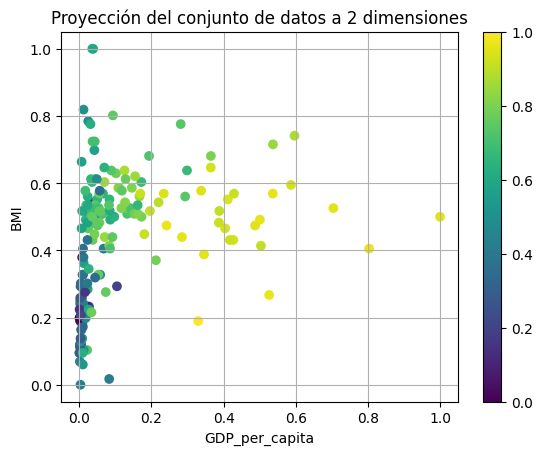

In [29]:
plt.scatter(data_2015['GDP_per_capita'], data_2015['BMI'],c=data_2015['Life_expectancy'], cmap='viridis')
plt.grid(True)
plt.xlabel('GDP_per_capita')
plt.ylabel('BMI')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()

Si parece haber

In [32]:
data_2015['groups'] = pd.NA
#Por cada registro hacemos:
for index,row in data_2015.iterrows():
    
    x = row['GDP_per_capita']
    y = row['BMI'] 
    if x >= 0.5 and y >= 0.5:
        group = 'mas'
    else: 
        group = 'menos'
    
        
    data_2015.at[index,'groups'] = group

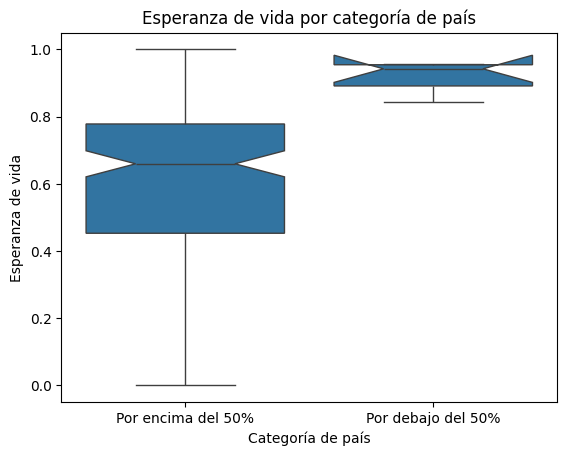

In [33]:
sns.boxplot(x='groups', y='Life_expectancy', data=data_2015, notch=True)
plt.title("Esperanza de vida por categoría de país")
plt.xlabel("Categoría de país")
plt.xticks(ticks=[0, 1], labels=["Por encima del 50%", "Por debajo del 50%"])
plt.ylabel("Esperanza de vida")
plt.show()

Seguro BMI no e slo de invercion en medicina, no se cual columna es pasamos a otra cosa.

# ```AGRUPAR PAISES```

In [34]:
dataset = dict()
dataset['url'] = 'https://ignaciorlando.github.io/datasets/data-science/Life-Expectancy-Data-Updated.csv'
dataset['extension'] = '.csv'
dataset['filename'] = 'life_expectancy_updated' + dataset['extension']
wget.download(dataset['url'], dataset['filename'])

# accedemos a los datos usando Pandas
original_table = pd.read_table(dataset['filename'],sep=',')

# nos quedamos solamente con la data de 2015
data_2015 = original_table[original_table['Year'] == 2015]
data_2015.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
6,Russian Federation,Rest of Europe,2015,6.6,8.2,223.0000,8.06,97,97,26.2,...,97,0.08,9313,144.10,2.3,2.3,12.0,0,1,71.2
27,Cameroon,Africa,2015,57.0,88.0,340.1265,4.55,84,64,24.3,...,84,1.12,1383,23.30,5.6,5.5,6.1,0,1,57.6
43,"Gambia, The",Africa,2015,39.7,59.8,261.7065,2.69,97,64,23.9,...,97,0.96,661,2.09,7.3,7.2,3.4,0,1,60.9


In [35]:
data_2015 = data_2015.drop('Economy_status_Developing', axis=1)
data_2015 = data_2015.rename(columns={'Economy_status_Developed': 'Developed'})

In [36]:
#Analicemos valores por si hay y hay y los borramos
copy_dataset = data_2015.dropna(axis=1)
data_2015

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Developed,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,82.8
6,Russian Federation,Rest of Europe,2015,6.6,8.2,223.0000,8.06,97,97,26.2,97,97,0.08,9313,144.10,2.3,2.3,12.0,0,71.2
27,Cameroon,Africa,2015,57.0,88.0,340.1265,4.55,84,64,24.3,77,84,1.12,1383,23.30,5.6,5.5,6.1,0,57.6
43,"Gambia, The",Africa,2015,39.7,59.8,261.7065,2.69,97,64,23.9,96,97,0.96,661,2.09,7.3,7.2,3.4,0,60.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2753,Tunisia,Africa,2015,14.8,17.2,91.3430,1.50,98,98,26.3,98,98,0.04,4095,11.18,6.5,6.4,7.0,0,75.9
2820,"Venezuela, RB",South America,2015,16.4,19.1,141.5540,6.21,87,83,26.7,87,87,0.40,17318,30.08,1.6,1.5,10.1,0,72.6
2840,Djibouti,Africa,2015,54.6,65.8,251.7490,0.32,84,82,24.0,84,84,0.22,2653,0.91,5.6,5.4,4.1,0,64.1
2846,Nicaragua,Central America and Caribbean,2015,16.6,19.4,148.4805,3.72,98,83,27.2,99,98,0.11,2050,6.22,1.8,1.7,6.5,0,73.6


In [37]:
#Estandarizamos
# Seleccionamos las columnas numéricas para la normalización
numeric_cols = data_2015.select_dtypes(include=np.number).columns

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustamos el scaler a los datos y transformamos los datos
data_2015[numeric_cols] = scaler.fit_transform(data_2015[numeric_cols])

# Imprimimos el DataFrame con los datos normalizados
data_2015.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Developed,Life_expectancy
0,Turkiye,Middle East,0.0,0.099678,0.077592,0.121614,0.078947,0.974026,0.564103,0.629310,0.967742,0.975904,0.004899,0.101754,0.056850,0.180451,0.172794,0.503937,0.0,0.778116
1,Spain,European Union,0.0,0.009646,0.007252,0.018355,0.619019,0.974026,0.935897,0.474138,0.967742,0.975904,0.005598,0.241888,0.033593,0.018797,0.014706,0.653543,1.0,0.969605
6,Russian Federation,Rest of Europe,0.0,0.051447,0.042785,0.374099,0.482057,0.974026,0.974359,0.491379,0.967742,0.975904,0.004899,0.085654,0.104372,0.082707,0.080882,0.834646,0.0,0.617021
27,Cameroon,Africa,0.0,0.591640,0.621465,0.626477,0.272129,0.805195,0.551282,0.327586,0.645161,0.819277,0.077677,0.010242,0.016822,0.206767,0.198529,0.370079,0.0,0.203647
43,"Gambia, The",Africa,0.0,0.406217,0.416969,0.457501,0.160885,0.974026,0.551282,0.293103,0.951613,0.975904,0.066480,0.003376,0.001450,0.270677,0.261029,0.157480,0.0,0.303951


In [38]:
data_2015 = data_2015.drop('Year', axis=1)

## ```CUANTOS CLUSTERS CONVIENE?```

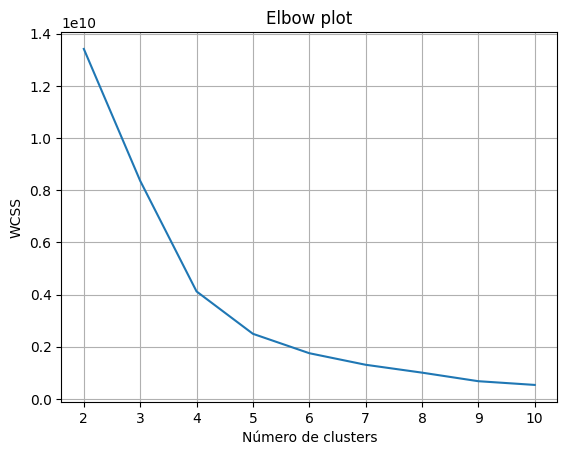

In [41]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# separamos las features de los nombres de los países
countries = data_2015['Country']
features_data_2015 = copy_dataset.drop(columns=['Country', 'Region'])

wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(features_data_2015)
    wcss.append(kmeans.inertia_)

# graficamos el elbow plot
plt.plot(range(2, 11), wcss)
plt.title('Elbow plot')
plt.grid("True")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

## ```CLUSTETING```

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# inicializamos un objeto de la clase KMeans con el modelo
kmeans = KMeans(n_clusters=4, verbose=0, random_state=10)
# lo aplicamos sobre nuestros datos para hallar los centroides
kmeans.fit(features_data_2015)
# y obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans_4 = kmeans.predict(features_data_2015)
print(clusters_kmeans_4)

[0 2 0 0 0 0 2 0 3 0 0 0 2 0 0 0 0 0 2 1 1 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0
 0 0 2 1 0 0 0 2 0 2 0 2 0 0 2 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 2 1 0 0
 0 0 1 0 0 0 2 0 1 0 2 1 0 0 2 0 0 0 0 1 0 0 0 0 2 0 0 2 0 1 2 0 3 0 1 0 0
 0 0 0 0 0 0 2 1 0 0 0 0 0 2 2 1 0 1 0 0 0 1 0 2 2 0 0 0 0 2 0 1 0 0 2 0 3
 0 1 2 0 2 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 2]


In [43]:
# Creamos un DataFrame con los países y los clusters asignados
cluster_df = pd.DataFrame({'Country': countries, 'Cluster': clusters_kmeans_4})

# Imprimimos los países de cada cluster
for cluster_num in range(4):
  print(f"\nCluster {cluster_num}:")
  print(cluster_df[cluster_df['Cluster'] == cluster_num]['Country'].tolist())


Cluster 0:
['Turkiye', 'Russian Federation', 'Cameroon', 'Gambia, The', 'Algeria', 'Madagascar', 'Vietnam', 'Eswatini', 'Botswana', 'Nepal', 'Congo, Dem. Rep.', 'Belarus', 'Angola', 'Ukraine', 'Chad', 'Solomon Islands', 'Iraq', 'Guinea-Bissau', 'Honduras', 'Guinea', 'Indonesia', 'Dominican Republic', 'Mexico', 'Benin', 'St. Vincent and the Grenadines', 'Kiribati', 'Brazil', 'Guyana', 'China', 'Eritrea', 'Grenada', 'Albania', 'Lesotho', 'India', 'Turkmenistan', 'Malawi', 'Myanmar', 'Burundi', 'Mozambique', 'Bulgaria', 'Sierra Leone', 'Syrian Arab Republic', 'El Salvador', 'Jordan', 'Tanzania', 'Gabon', 'Azerbaijan', 'Nigeria', 'Thailand', 'Mongolia', 'Maldives', 'Comoros', 'Uganda', 'Sao Tome and Principe', 'Pakistan', 'Ghana', 'Afghanistan', 'Belize', 'Lebanon', 'Jamaica', 'Equatorial Guinea', 'North Macedonia', 'Morocco', 'Senegal', 'St. Lucia', 'Colombia', 'Tajikistan', 'Moldova', 'Congo, Rep.', 'Namibia', 'Zimbabwe', 'Kenya', 'Montenegro', 'Bolivia', 'Kyrgyz Republic', 'Guatemala',

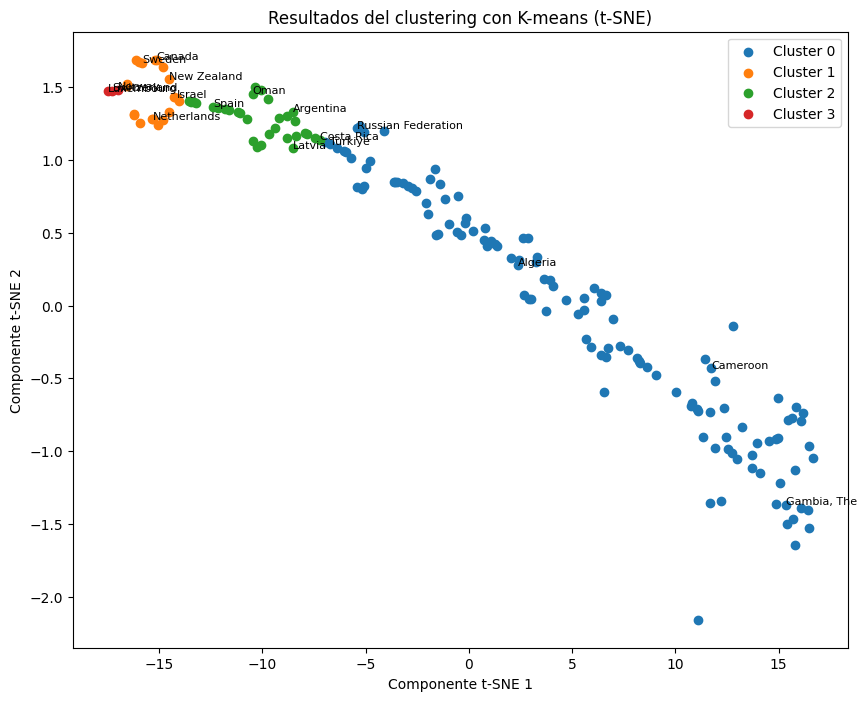

In [44]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reducir la dimensionalidad de los datos usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_data_2015)

# Crear un DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({'x': tsne_results[:, 0], 'y': tsne_results[:, 1], 'Cluster': clusters_kmeans_4, 'Country': countries})

# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(4):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')

  # Seleccionar 5 países para etiquetar en cada cluster, incluyendo Argentina si está presente
  countries_to_label = tsne_df[tsne_df['Cluster'] == cluster_num]['Country'].tolist()
  if 'Argentina' in countries_to_label:
    countries_to_label.remove('Argentina')
    countries_to_label = ['Argentina'] + countries_to_label[:4]
  else:
    countries_to_label = countries_to_label[:5]

  for country in countries_to_label:
    row = tsne_df[(tsne_df['Cluster'] == cluster_num) & (tsne_df['Country'] == country)]
    if not row.empty:
      plt.text(row['x'].values[0], row['y'].values[0], country, fontsize=8)

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.show()

# ```Los paises del cluster 1 tienen mas escolaridad que los del 0```

## ```ANALISIS GRAFICO```

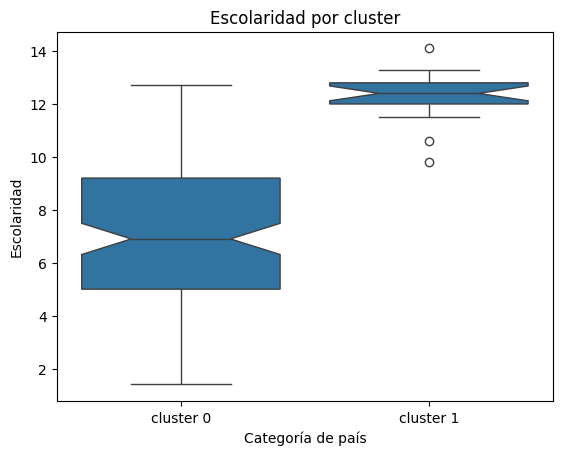

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

features_data_2015['Clusters'] = clusters_kmeans_4
# Filtra los datos donde el cluster es 1 o 3
features_data_2015_clusters_1_3 = features_data_2015[(features_data_2015['Clusters'] == 1) | (features_data_2015['Clusters'] == 0)]

sns.boxplot(x='Clusters', y='Schooling', data=features_data_2015_clusters_1_3, notch=True)
plt.title("Escolaridad por cluster")
plt.xlabel("Categoría de país")
plt.xticks(ticks=[0, 1], labels=["cluster 0", "cluster 1"])
plt.ylabel("Escolaridad")
plt.show()

## ```ANALISIS ESTADISTICO```

### ```NORMALIDAD```

In [52]:
# Separamos los datos en dos grupos, desarrollados y en vías de desarrollo
cluster0 = features_data_2015[features_data_2015['Clusters'] == 0]['Schooling']
cluster1 = features_data_2015[features_data_2015['Clusters'] == 1]['Schooling']

# Test de Shapiro-Wilk para países desarrollados
stat, p = shapiro(cluster0)
print(f"Test de Shapiro-Wilk para países cluster 0: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para países en vías de desarrollo
stat, p = shapiro(cluster1)
print(f"Test de Shapiro-Wilk para países cluster 1: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para países cluster 0: Estadístico=0.975, p-valor=0.022
Test de Shapiro-Wilk para países cluster 1: Estadístico=0.938, p-valor=0.220


cluster 0 no lo es

### ```HOMOCEDASTICIDAD```

In [53]:
import scipy.stats as stats
stat, p = stats.levene(cluster0, cluster1)
print(f"Test de Levene para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para GDP_per_capita: Estadístico=25.730, p-valor=0.000


NO SON HOMOCEDASTICOS

### ```TEST```

In [55]:
# Test de Kruskal-Wallis para comparar GDP_per_capita entre países desarrollados y en vías de desarrollo
stat, p = stats.kruskal(cluster0, cluster1)
print(f"Test de Kruskal-Wallis para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")



Test de Kruskal-Wallis para GDP_per_capita: Estadístico=45.477, p-valor=0.000


SON SIGNIFICATIVAMENTE DISTINTOS ASI QUE SE RECHAZA LA HIPOTESIS NULA Y PODEMOS DECIR QUE HAY MAS ESCOLARIDAD EN LOS PAISES DEL CLUSTER 1